In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [3]:
df = pd.read_csv('modifiedIris2Classes.csv')


In [5]:
df.shape


(100, 5)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['petal length (cm)']], df['target'], random_state=0)


In [9]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
clf = LogisticRegression()


In [13]:
clf.fit(X_train, y_train)


LogisticRegression()

In [15]:
# One observation's petal length after standardization
X_test[0].reshape(1,-1)

array([[-0.12093628]])

In [17]:
print('prediction', clf.predict(X_test[0].reshape(1,-1))[0])
print('probability', clf.predict_proba(X_test[0].reshape(1,-1)))

prediction 0
probability [[0.52724142 0.47275858]]


In [19]:
example_df = pd.DataFrame()
example_df.loc[:, 'petal length (cm)'] = X_test.reshape(-1)
example_df.loc[:, 'target'] = y_test.values
example_df['logistic_preds'] = pd.DataFrame(clf.predict_proba(X_test))[1]

In [21]:
example_df.head()


petal length (cm)  target  logistic_preds
0          -0.120936       0        0.472759
1           0.846554       1        0.950691
2           0.000000       0        0.568184
3           2.055917       1        0.998881
4           1.330299       1        0.988939

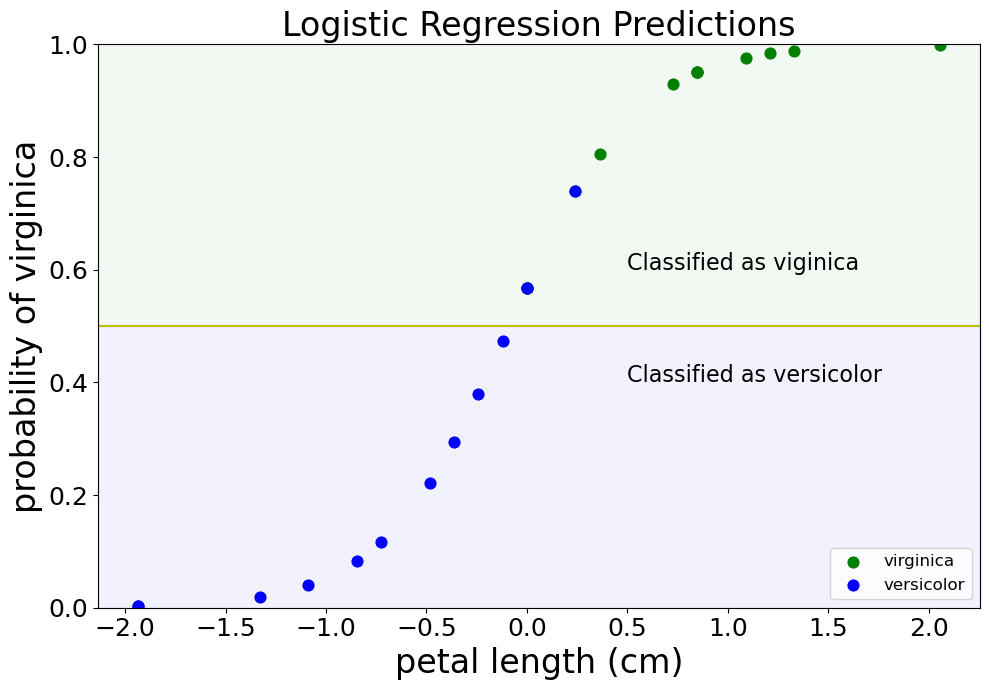

In [23]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));


virginicaFilter = example_df['target'] == 1
versicolorFilter = example_df['target'] == 0

ax.scatter(example_df.loc[virginicaFilter, 'petal length (cm)'].values,
            example_df.loc[virginicaFilter, 'logistic_preds'].values,
           color = 'g',
           s = 60,
           label = 'virginica')


ax.scatter(example_df.loc[versicolorFilter, 'petal length (cm)'].values,
            example_df.loc[versicolorFilter, 'logistic_preds'].values,
           color = 'b',
           s = 60,
           label = 'versicolor')

ax.axhline(y = .5, c = 'y')

ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')
ax.text(0.5, .6, 'Classified as viginica', fontsize = 16)
ax.text(0.5, .4, 'Classified as versicolor', fontsize = 16)

ax.set_ylim(0,1)
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)
ax.tick_params(labelsize = 18)
ax.set_xlabel('petal length (cm)', fontsize = 24)
ax.set_ylabel('probability of virginica', fontsize = 24)
ax.set_title('Logistic Regression Predictions', fontsize = 24)
fig.tight_layout()

In [25]:

score = clf.score(X_test, y_test)
print(score)

0.88


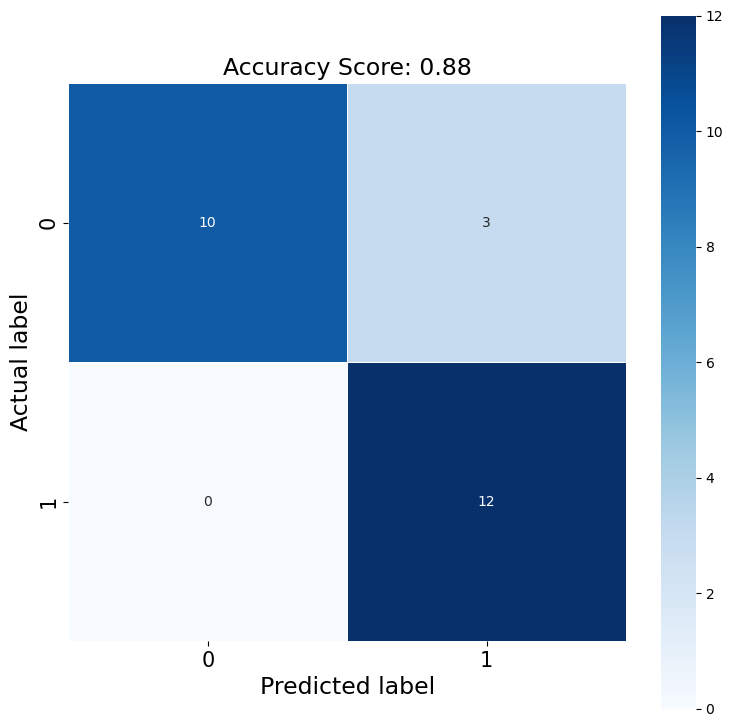

In [27]:

cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

In [31]:

# ignore this code

modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        

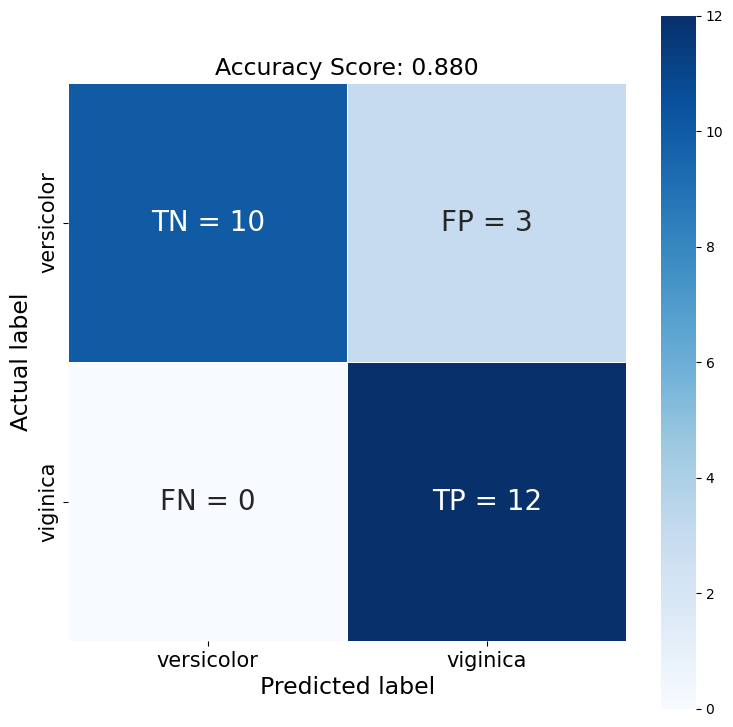

In [33]:

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['versicolor', 'viginica'],
            yticklabels = ['versicolor', 'viginica'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {:.3f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)